# Actividad 5: Procesamiento de conjuntos de datos en Python
# Ramiro Emiliano Martinez De La Cruz - 2014197 - Martes M4
# María Fernanda Garza Barbosa - 1945003 - Martes N4
# Karla Judith Corona Castro - 1923390 - Martes N4
# Abraham Giovanni Aguirre Bravo  2014222 - N4

# Librerias


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Limpieza de datos

Cargar el dataset con pandas

In [ ]:
df = pd.read_csv('/content/robot_sensors.csv')

Mostrar primeras filas del dataset

In [ ]:
print(df.head(5))

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246


Eliminar filas con valores nulos

In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None
(1000, 4)


In [ ]:
print(df.isnull().sum())

Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 913 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        913 non-null    int64  
 1   Distancia (cm)    913 non-null    float64
 2   Velocidad (cm/s)  913 non-null    float64
 3   Temperatura (°C)  913 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 35.7 KB
None


Filtrar valores atípicos

In [ ]:
summary_stats = df.describe()
summary_stats

,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
count,913.000000,913.000000,913.000000,913.000000
mean,498.173056,54.079714,25.324031,27.538971
std,289.608036,26.423786,14.623216,4.377366
min,0.000000,10.416882,0.160913,20.000175
25%,248.000000,30.591835,12.060073,23.904303
50%,498.000000,55.136467,25.988697,27.546259
75%,746.000000,76.669176,38.051395,31.415119
max,999.000000,99.974591,49.970686,34.967313


In [ ]:
negative_values = (df < 0).sum()
negative_values

,0
Tiempo (s),0
Distancia (cm),0
Velocidad (cm/s),0
Temperatura (°C),0


# Normalizar los datos numéricos con Min-Max Scaling

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

In [ ]:
scaler = MinMaxScaler()
df[['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']] = scaler.fit_transform(df[['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']])

# Visualizar los datos normalizados usando matplotlib (valores vs tiempo)

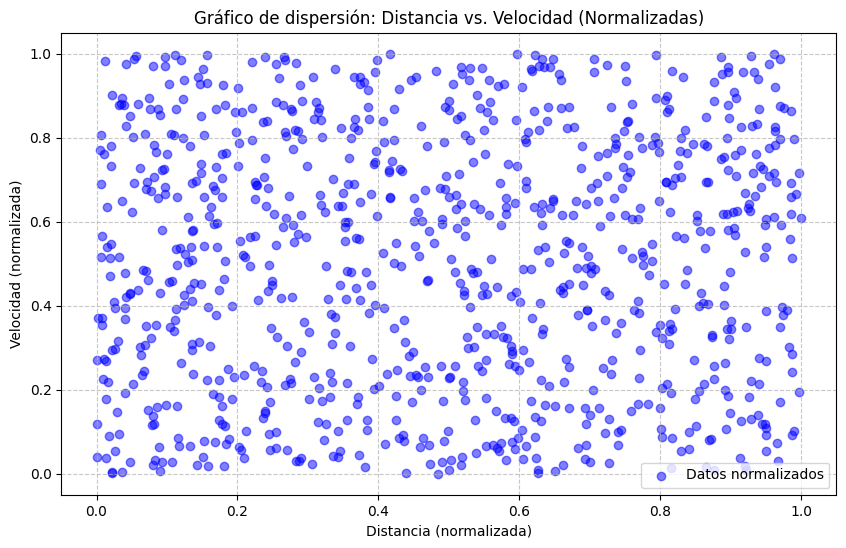

In [ ]:
# Gráfico de dispersión: Distancia vs. Velocidad
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Distancia (cm)'],
    df['Velocidad (cm/s)'],
    alpha=0.5,
    color='blue',
    label='Datos normalizados'
)

# Personalización
plt.title('Gráfico de dispersión: Distancia vs. Velocidad (Normalizadas)')
plt.xlabel('Distancia (normalizada)')
plt.ylabel('Velocidad (normalizada)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

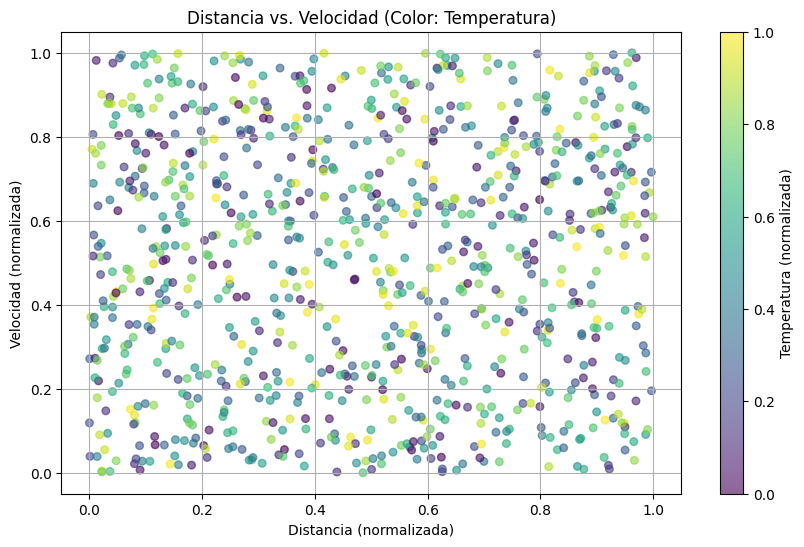

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['Distancia (cm)'],
    df['Velocidad (cm/s)'],
    c=df['Temperatura (°C)'],  # Color por temperatura
    cmap='viridis',
    alpha=0.6,
    s=30  # Tamaño de los puntos
)

# Barra de color
plt.colorbar(scatter, label='Temperatura (normalizada)')
plt.title('Distancia vs. Velocidad (Color: Temperatura)')
plt.xlabel('Distancia (normalizada)')
plt.ylabel('Velocidad (normalizada)')
plt.grid(True)
plt.show()

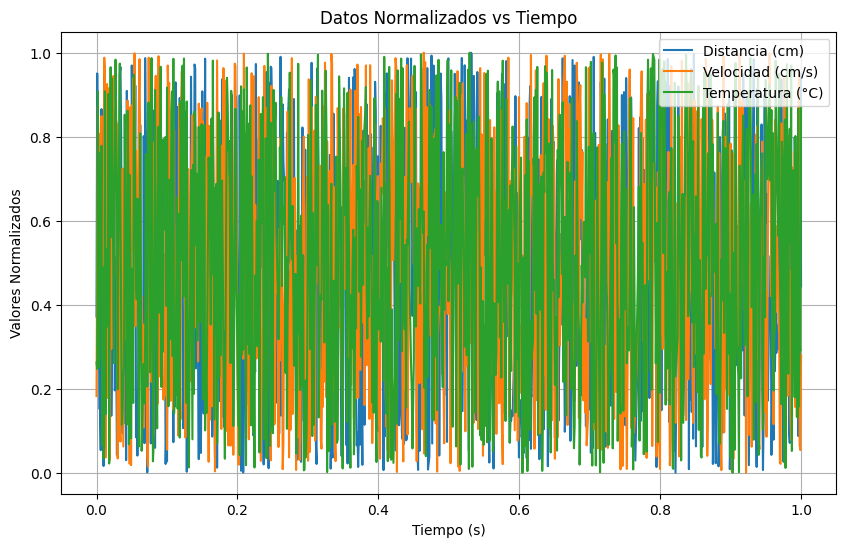

In [ ]:
# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada variable en función del tiempo
for col in numeric_cols:
    if col != "Tiempo (s)":
        plt.plot(df["Tiempo (s)"], df[col], label=col)

# Personalizar la gráfica
plt.xlabel("Tiempo (s)")
plt.ylabel("Valores Normalizados")
plt.title("Datos Normalizados vs Tiempo")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Vinculos:
https://colab.research.google.com/drive/1TlrzUp0b8k1EslCNJvY9uvuxzq0oFftu?usp=sharing